In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/DIA-CompanionChatbot/CNN/New Attempt/Text-Emotion-Analysis/

/content/drive/MyDrive/Colab Notebooks/DIA-CompanionChatbot/CNN/New Attempt/Text-Emotion-Analysis


In [3]:
print("With TF CPU")
!pip install pickleshare==0.7.5
!pip install keras==2.8.0
!pip install tensorflow-cpu==2.8.0
!pip install Keras-Preprocessing==1.1.2

With TF CPU
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.8.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'
import itertools, pickle

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/DIA-CompanionChatbot/CNN/New Attempt/Text-Emotion-Analysis/

/content/drive/MyDrive/Colab Notebooks/DIA-CompanionChatbot/CNN/New Attempt/Text-Emotion-Analysis/Best CNN NLTP


In [ ]:
model_test = load_model('BESTCNNWeightsNLTP.h5')

In [ ]:
to_test = "Love is the key to happiness. We all want to lead a happy life. People look around for happiness in power, fashion, wealth, drugs etc. But these things can only give temporary pleasures. The power of love can create miracles. Love can create unity among nations and its citizens. Love is the most beautiful feeling in the world. Love has given different meaning by different people depending upon how they have experienced this wonderful feeling."


In [ ]:
print(to_test)

Love is the key to happiness. We all want to lead a happy life. People look around for happiness in power, fashion, wealth, drugs etc. But these things can only give temporary pleasures. The power of love can create miracles. Love can create unity among nations and its citizens. Love is the most beautiful feeling in the world. Love has given different meaning by different people depending upon how they have experienced this wonderful feeling.


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

to_test = to_test.replace('[^\w\s]',' ')

to_test = ' '.join([word for word in to_test.split() if word not in stop])

to_test = " ".join([Word(word).lemmatize() for word in to_test.split()])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(to_test)

Love key happiness. We want lead happy life. People look around happiness power, fashion, wealth, drug etc. But thing give temporary pleasures. The power love create miracles. Love create unity among nation citizens. Love beautiful feeling world. Love given different meaning different people depending upon experienced wonderful feeling.


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/DIA-CompanionChatbot/CNN/New Attempt/Text-Emotion-Analysis/

/content/drive/MyDrive/Colab Notebooks/DIA-CompanionChatbot/CNN/New Attempt/Text-Emotion-Analysis


In [ ]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

classes = ["Neutral", "Happy", "Sad", "Love", "Anger"]

In [ ]:
MAX_SEQUENCE_LENGTH = 30 # max length of text (words) including padding
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
# from keras.models import Model

sequences_test = tokenizer.texts_to_sequences(to_test)
data_int_t = pad_sequences(sequences_test, padding='pre', maxlen=(MAX_SEQUENCE_LENGTH-5))
data_test = pad_sequences(data_int_t, padding='post', maxlen=(MAX_SEQUENCE_LENGTH))
y_prob = model_test.predict(data_test)

AttributeError: ignored

In [4]:
#Testing newly - seeing if new weights work

In [5]:
import pickle
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from textblob import Word

stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
# tokenizer object loaded to map texts into sequences
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [7]:
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

In [33]:
model = load_model("NEW-checkpoint-0.6644.h5")
stop = stopwords.words('english')
MAX_SEQUENCE_LENGTH = 30

In [37]:
message = "im angry"
message = ' '.join([word for word in message.split() if word not in stop])
message = " ".join([Word(word).lemmatize() for word in message.split()])
message = [message]

sequences = tokenizer.texts_to_sequences(message)
pre_padding = pad_sequences(sequences, padding='pre', maxlen=(MAX_SEQUENCE_LENGTH - 5))
post_padding = pad_sequences(pre_padding, padding='post', maxlen=MAX_SEQUENCE_LENGTH)

y_prob = model.predict(post_padding)
print(y_prob[0])

[0.01659896 0.00409733 0.10470482 0.00904492 0.865554  ]


In [ ]:
# Neutral - 0, Happy - 1, Sad - 2, Love - 3, Angry - 4

In [47]:
#Re-building Confusion matrix

In [73]:
import pandas as pd

df = pd.read_csv("Handpicked.csv")

In [61]:
df.head()
stop = stopwords.words('english')

In [74]:
df.head()


,Text,Emotion,EmotionSVMLOGREG,EmotionsCNN
0,"I don't feel like doing anything today, everyt...",sad,4,2
1,I just found out my grandmother passed away an...,sad,4,2
2,"I feel so alone and isolated, like no one unde...",sad,4,2
3,"I can't believe I lost my job, how am I going ...",sad,4,2
4,"I miss my ex so much, it's hard to move on.",sad,4,2


In [75]:
actual_emotion = df['EmotionsCNN']

In [76]:
to_test = df['Text']

In [77]:
new_test = []

for i in to_test:
  x = ' '.join([word for word in i.split() if word not in stop])
  x = " ".join([Word(word).lemmatize() for word in x.split()])
  new_test.append(x)

In [82]:
len(new_test)

50

In [83]:
new_list = []


In [85]:
for i in range(50):
    new_list.append([new_test[i]])

In [87]:
MAX_SEQUENCE_LENGTH = 30 # max length of text (words) including padding
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [88]:
final_list = []

for i in new_list:
    sequences_test = tokenizer.texts_to_sequences(i)
    data_int_t = pad_sequences(sequences_test, padding='pre', maxlen=(MAX_SEQUENCE_LENGTH-5))
    data_test = pad_sequences(data_int_t, padding='post', maxlen=(MAX_SEQUENCE_LENGTH))
    final_list.append(data_test)

In [89]:
final_list[49]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,   38, 4440, 6759,   36, 2423,  124,
         138,   95,  133,    0,    0,    0,    0,    0]], dtype=int32)

In [90]:
pred = []
for i in range(len(final_list)):
    pred.append(model.predict(final_list[i]).argmax())

In [92]:
from sklearn.metrics import classification_report
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

In [93]:
print(classification_report(actual_emotion, pred))

              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.70      0.70      0.70        10
           2       0.50      1.00      0.67        10
           3       0.89      0.80      0.84        10
           4       1.00      0.80      0.89        10

    accuracy                           0.72        50
   macro avg       0.82      0.72      0.71        50
weighted avg       0.82      0.72      0.71        50



In [94]:
x = confusion_matrix(actual_emotion, pred)

In [95]:
classes = ["Neutral", "Happy", "Sad", "Love", "Anger"]

<Axes: >

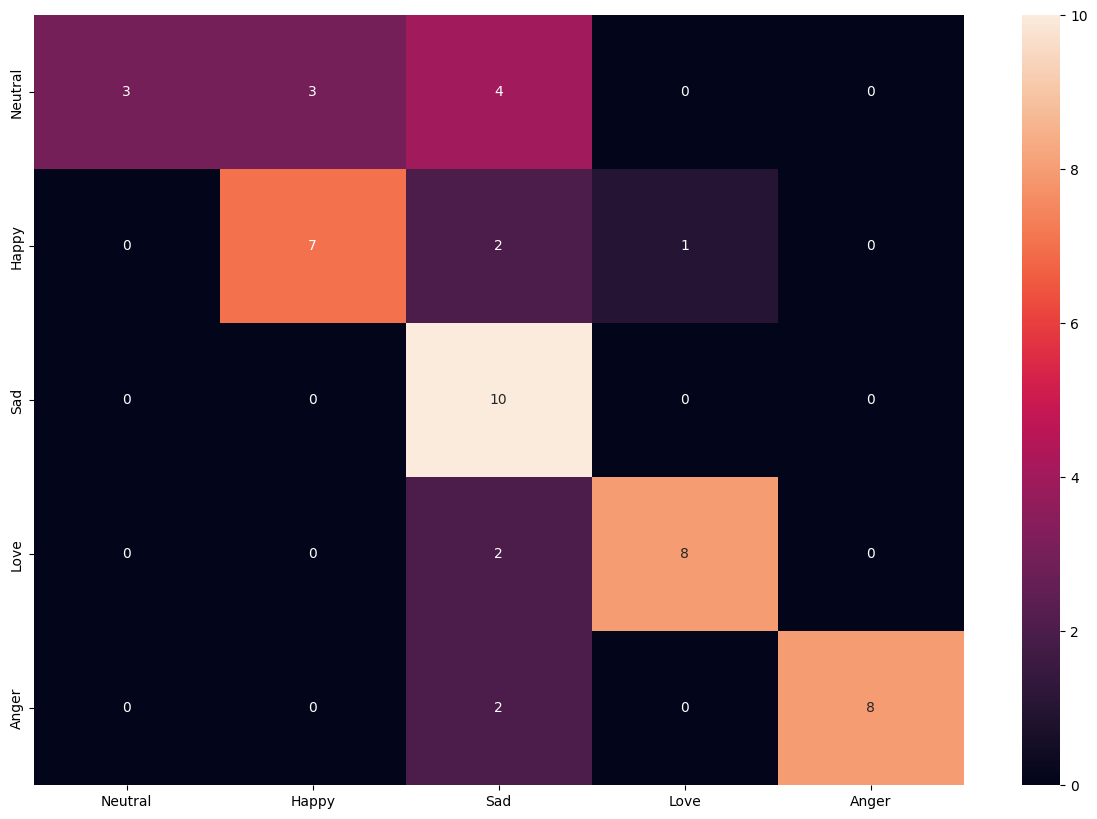

In [96]:
df_cm = pd.DataFrame(x, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (15,10))

sn.heatmap(df_cm, annot=True)